# International Roller Coaster Rankings

Roller coasters are thrilling amusement park rides designed to make you squeal and scream! They take you up high, drop you to the ground quickly, and sometimes even spin you upside down before returning to a stop. Today we will be visualizing data covering international roller coaster rankings and roller coaster statistics.

### Roller Coaster Categories

Roller coasters are often split into two main categories based on their construction material: wood or steel. Data is for the duration of **2013 to 2018 (5 years)**. Golden Ticket Awards are provided in the following files -

|                                  Wood |                                   Steel|
|:-------------------------------------:|:--------------------------------------:|
|Golden_Ticket_Award_Winners_Wood.csv   | Golden_Ticket_Award_Winners_Steel.csv  |


In [1]:
import seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
#rankings data here:
wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
print(wood.head())
print(steel.head())

coasters = pd.read_csv('roller_coasters.csv')
print(coasters.head())

   Rank          Name                       Park             Location  \
0     1  Boulder Dash             Lake Compounce       Bristol, Conn.   
1     2       El Toro  Six Flags Great Adventure        Jackson, N.J.   
2     3       Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
3     4    The Voyage              Holiday World    Santa Claus, Ind.   
4     5   Thunderhead                  Dollywood  Pigeon Forge, Tenn.   

           Supplier  Year Built  Points  Year of Rank  
0               CCI        2000    1333          2013  
1           Intamin        2006    1302          2013  
2  Dinn/PTC-Schmeck        1985    1088          2013  
3     Gravity Group        2006    1086          2013  
4              GCII        2004     923          2013  
   Rank                Name                        Park           Location  \
0     1    Millennium Force                 Cedar Point     Sandusky, Ohio   
1     2             Bizarro       Six Flags New England      Agawam, 

### Building a function to plot line graph 
Built a function that will plot the ranking of a given roller coaster over time as a line. 

### Inputs
**Argument 1** - Roller Coaster Name <br />
**Argument 2** - Roller Coaster Park Name <br />
**Argument 3** - Type of Roller Coaster (Steel / Wood) <br />

In [3]:

def graphplot (rollercoaster_name, rollercoaster_parkname, rollercoaster_type):
    temp_table = \
    rollercoaster_type[(rollercoaster_type['Name'] == rollercoaster_name) & (rollercoaster_type['Park'] == rollercoaster_parkname)]
    ax = plt.subplot()
    ax.set_xlabel('Year of Ranking')
    ax.set_ylabel('Ranking')
    plt.title('Rankings of ' + rollercoaster_name + ', ' + rollercoaster_parkname)
    plt.plot(temp_table['Year of Rank'],temp_table['Rank'])
    plt.show()

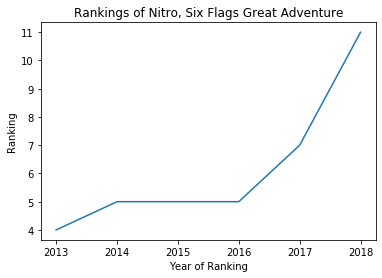

In [4]:
graphplot('Nitro', 'Six Flags Great Adventure', steel)

### Building a function to plot line graph 
Built a function that will plot the ranking of 2 roller coasters over time as a line. 

### Inputs
**Argument 1** - First Roller Coaster Name <br />
**Argument 2** - Second Roller Coaster Name <br />
**Argument 3** - Type of Roller Coaster (Steel / Wood) <br />


In [5]:

def graphplot_2_coasters (rollercoaster_1,  rollercoaster_2, rollercoaster_type):
    rollercoaster1_temp = \
    rollercoaster_type[(rollercoaster_type['Name'] == rollercoaster_1)].reset_index()
    #print(rollercoaster1_temp)
    
    rollercoaster2_temp = \
    rollercoaster_type[(rollercoaster_type['Name'] == rollercoaster_2)].reset_index()
    #print(rollercoaster2_temp)

    plt.plot(rollercoaster1_temp['Year of Rank'],rollercoaster1_temp['Rank'])
    plt.plot(rollercoaster2_temp['Year of Rank'],rollercoaster2_temp['Rank'])

    ax = plt.subplot()
    ax.set_xlabel('Year of Ranking')
    ax.set_ylabel('Ranking')
    plt.legend([rollercoaster_1,  rollercoaster_2])
    plt.title('Rankings of ' + rollercoaster_1 + ' and ' + rollercoaster_2)
    plt.show()
    
    plt.clf()

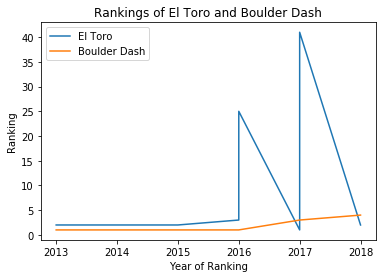

<Figure size 432x288 with 0 Axes>

In [6]:
graphplot_2_coasters('El Toro','Boulder Dash', wood)

### Building a function to plot line graph 
Built a function that will plot the ranking of the top 'n' roller coasters over time as a line. 

### Inputs
**Argument 1** - n Rankings <br />
**Argument 2** - Roller Coaster Type 

In [7]:

def topranking (ranking, rollercoaster_type):
    
    rollercoaster_temp = rollercoaster_type[(rollercoaster_type['Rank'] <= ranking)].reset_index()
    #print(rollercoaster_temp)
    
    plt.figure(figsize=(8,8))
    ax = plt.subplot()
    ax.set_xlabel('Year of Ranking')
    ax.set_ylabel('Ranking')
    plt.title('Top '+ str(ranking) + ' Roller Coasters over the years')
   
    for i in set(rollercoaster_temp['Name']):
        rollercoaster_ranking = rollercoaster_temp[rollercoaster_temp['Name'] == i]
        ax.plot(rollercoaster_ranking['Year of Rank'], rollercoaster_ranking['Rank'], marker = 'o', label = i)
    plt.legend(rollercoaster_temp['Name'].unique(), loc=8)
    
    # Shrink current axis by 10%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    

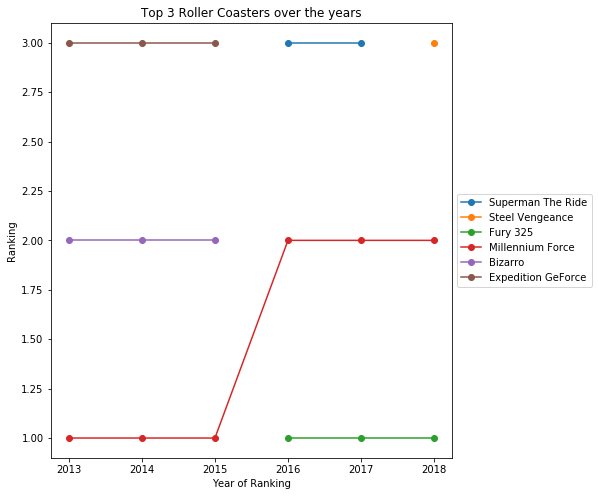

In [8]:
topranking(3, steel)

### Building a function to plot histogram 
Built a function that will plot the of any numeric column of the roller coasters dataframe.

### Inputs
**Argument 1** - Column name from Coasters dataframe

In [9]:

def histogramplot(column_name):
    dataset = coasters[column_name].dropna()
    
    plt.hist(dataset)
    ax = plt.subplot()
    ax.set_xlabel(column_name)
    ax.set_ylabel('Frequency')
    plt.title('Roller Coaster ' + column_name + ' Distribution')
    plt.show()

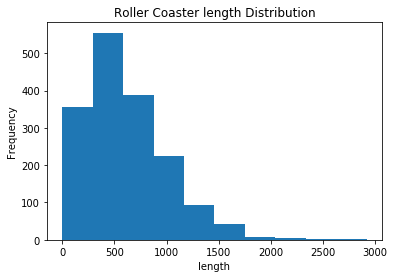

In [10]:
histogramplot('length')

### Building a function to plot line graph 
Built a function that will create a bar chart showing the number of inversions for each roller coaster at a specific amusement park
 
### Inputs
**Argument 1** - Roller Coaster Park Name

In [20]:

def bar_inversion(rollercoaster_park):
    
    park_temp = coasters[(coasters['park'] == rollercoaster_park)].reset_index()
    #print(park_temp)
    coaster_names = park_temp['name']
    number_inversions = park_temp['num_inversions']
    
    #inversion_legend = coasters[(coasters['park'] == rollercoaster_park)].reset_index()
    plt.figure(figsize=(8,8))
    ax = plt.subplot()
    ax.set_xticks(range(len(coaster_names)))
    ax.set_xticklabels(coaster_names,rotation=90)
    ax.set_xlabel('Roller Coaster')
    ax.set_ylabel('Number of Inversions')
    plt.title('Inversions in Roller Coaster Park - ' + rollercoaster_park)
    plt.bar(range(len(number_inversions)),number_inversions)
plt.show()

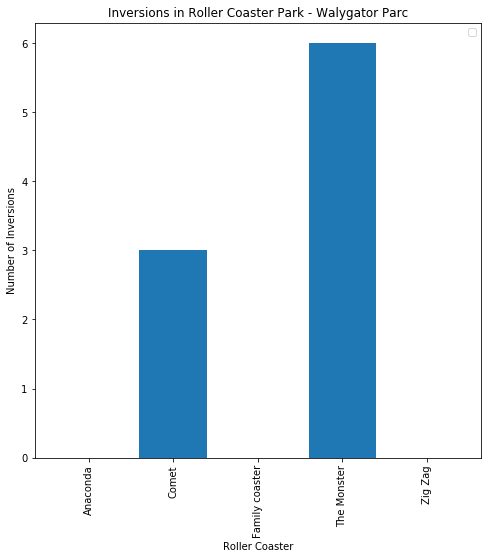

In [19]:
bar_inversion('Walygator Parc')

### Building a function to plot line graph 
Built a function that will create a pie chart that compares the number of operating roller coasters to the number of closed roller coasters 
 
### Inputs
**Argument 1** - Roller Coaster Dataframe

In [13]:

def pie_operating(rollercoaster_df):
    operating_temp = rollercoaster_df[(rollercoaster_df['status'] == 'status.operating')]
    closed_temp = rollercoaster_df[(rollercoaster_df['status'] == 'status.closed.definitely')]
    operating_temp_len = len(operating_temp)
    closed_temp_len = len(closed_temp)
    dataset = [operating_temp_len, closed_temp_len]
    plt.figure(figsize=(5.5,5.5))
    plt.pie(dataset, autopct='%0.1f%%', pctdistance=0.8, startangle=90, textprops={'color':"w"})
    plt.legend(['Operating','Closed'])
    plt.title('Proportion of Operating and Closed Roller Coasters')
    plt.axis('equal')
plt.show()


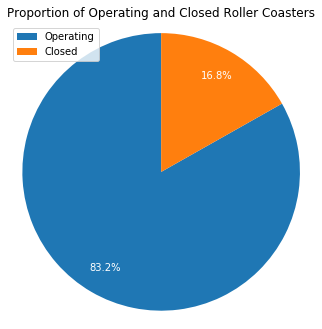

In [14]:
pie_operating(coasters)

### Building a function to plot line graph 
Built a function that will create a scatter plot of two numeric columns of the roller coaster DataFrame.
 
### Inputs
**Argument 1** - Roller Coaster Dataframe <br />
**Argument 1** - Roller Coaster Column 1 <br />
**Argument 1** - Roller Coaster Column 2

In [15]:
def scatterplot(rollercoaster_df, column_name1, column_name2):
    plt.scatter(rollercoaster_df[column_name1], rollercoaster_df[column_name2], alpha=0.5)  
plt.show()

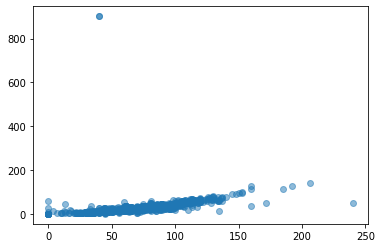

In [16]:
scatterplot(coasters, 'speed','height')